In [102]:
import pandas as pd
from sklearn.linear_model import LassoCV
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
%matplotlib inline
from sklearn import linear_model

In [120]:
df = pd.read_csv(r"C:\Users\ASUS\hp2.csv",encoding='latin1')

In [121]:
df.head()

,Property Type,Bed,Bath,Area,Location,Price,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Apartment,2,2,775,Sector 10,"3,800,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apartment,2,2,765,Sector 10,"3,978,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apartment,2,2,772,Sector 10,"4,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apartment,2,2,1008,Sector 10,"4,200,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Apartment,2,2,"1,005",Sector 10,"4,200,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [123]:
df.head()

,Property Type,Bed,Bath,Area,Location,Price
0,Apartment,2,2,775,Sector 10,"3,800,000"
1,Apartment,2,2,765,Sector 10,"3,978,000"
2,Apartment,2,2,772,Sector 10,"4,000,000"
3,Apartment,2,2,1008,Sector 10,"4,200,000"
4,Apartment,2,2,"1,005",Sector 10,"4,200,000"


In [107]:
df = df.drop('Location',axis='columns')

In [108]:
df = df.drop('Property Type',axis='columns')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 4 columns):
Bed      526 non-null int64
Bath     526 non-null int64
Area     526 non-null object
Price    526 non-null object
dtypes: int64(2), object(2)
memory usage: 16.6+ KB


In [110]:
df['Price'] = (df['Price'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df['Area'] = (df['Area'].str.split()).apply(lambda x: int(x[0].replace(',', '')))

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 4 columns):
Bed      526 non-null int64
Bath     526 non-null int64
Area     526 non-null int64
Price    526 non-null float64
dtypes: float64(1), int64(3)
memory usage: 16.6 KB


In [112]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['Bed','Bath','Area']],df.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
reg.coef_

array([  57546.58466486, -467615.47102112,   10634.53173539])

In [114]:
reg.predict([[2,2,775]])

array([3569631.0752251])

In [115]:
#Here
df.head()

,Bed,Bath,Area,Price
0,2,2,775,3800000.0
1,2,2,765,3978000.0
2,2,2,772,4000000.0
3,2,2,1008,4200000.0
4,2,2,1005,4200000.0


In [116]:
df.groupby('Location')['Location'].agg('count')

KeyError: 'Location'

In [124]:
#from here starts
df = df.assign(Location='Uttara')

In [125]:
df['Price'] = (df['Price'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df['Area'] = (df['Area'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

In [126]:
df = df.drop('Property Type',axis='columns')

In [127]:
dummies = pd.get_dummies(df.Location)

In [128]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,Bed,Bath,Area,Location,Price,Uttara
0,2,2,775.0,Uttara,3800000.0,1
1,2,2,765.0,Uttara,3978000.0,1
2,2,2,772.0,Uttara,4000000.0,1
3,2,2,1008.0,Uttara,4200000.0,1
4,2,2,1005.0,Uttara,4200000.0,1


In [129]:
df = df.drop('Location',axis='columns')


df.head()

,Bed,Bath,Area,Price,Uttara
0,2,2,775.0,3800000.0,1
1,2,2,765.0,3978000.0,1
2,2,2,772.0,4000000.0,1
3,2,2,1008.0,4200000.0,1
4,2,2,1005.0,4200000.0,1


In [130]:
X = df.drop(['Price'],axis='columns')
X.head()

,Bed,Bath,Area,Uttara
0,2,2,775.0,1
1,2,2,765.0,1
2,2,2,772.0,1
3,2,2,1008.0,1
4,2,2,1005.0,1


In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [132]:
y = df.Price


In [133]:
y.head()

0    3800000.0
1    3978000.0
2    4000000.0
3    4200000.0
4    4200000.0
Name: Price, dtype: float64

In [134]:
model.fit(X,y)
model.score(X,y)

0.7126687714928226

In [135]:
model.predict([[2,2,775,1]])

array([3569631.0752251])

In [136]:
print(model.coef_)

[  57546.58466486 -467615.47102112   10634.53173539       0.        ]


In [137]:
def predict_price(Bed,Bath,Area,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [138]:
y.shape

(526,)

In [139]:
predict_price(5,5,3700,'Uttara')

33445429.74217414

In [140]:
model.predict([[2,2,775,1]])

array([3569631.0752251])

In [141]:
#Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [142]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.809834316325895

In [143]:
print(lr_clf.coef_)

[ -70166.96293835 -399011.70429354   10610.07422246       0.        ]


In [144]:
def predict_price(Bed,Bath,Area,location):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [145]:
predict_price(5,5,770,'Uttara')

2219346.5718546566

In [146]:
lr_clf.predict([[2,2,775,1]])

array([3679932.94466265])

In [147]:
y_test.head()

366    13000000.0
477    20000000.0
133     8300000.0
220     9610000.0
124     8000000.0
Name: Price, dtype: float64

In [148]:
y_pred = lr_clf.predict(X_test)

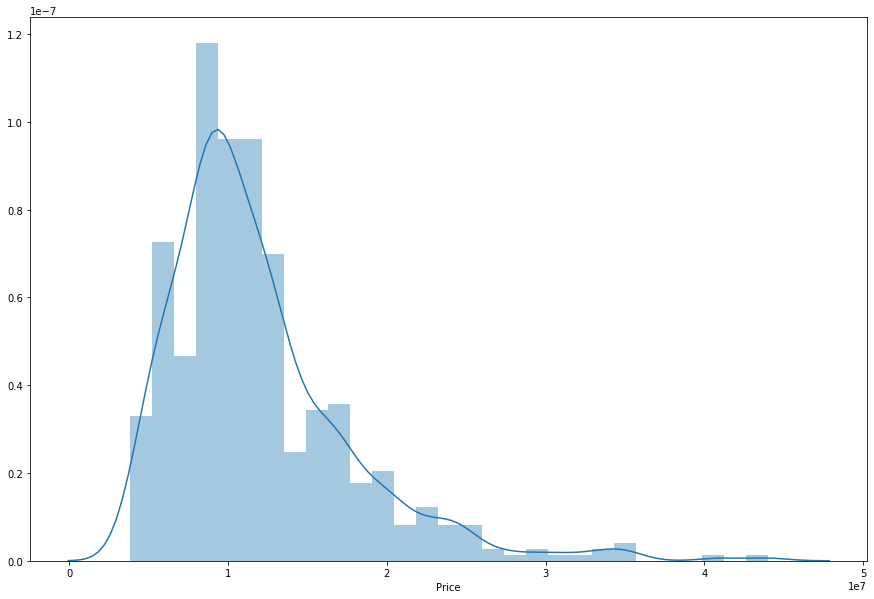

In [149]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Price'])

In [150]:
coeff_df = pd.DataFrame(lr_clf.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Bed,-70166.962938
Bath,-399011.704294
Area,10610.074222
Uttara,0.000000


In [151]:
lr_clf.intercept_

-3604517.2432832234

In [152]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [153]:
df1.head()

,Actual,Predicted
366,13000000.0,1.275755e+07
477,20000000.0,1.765934e+07
133,8300000.0,1.031307e+07
220,9610000.0,1.143356e+07
124,8000000.0,8.649551e+06


In [154]:
df1.head()

,Actual,Predicted
366,13000000.0,1.275755e+07
477,20000000.0,1.765934e+07
133,8300000.0,1.031307e+07
220,9610000.0,1.143356e+07
124,8000000.0,8.649551e+06


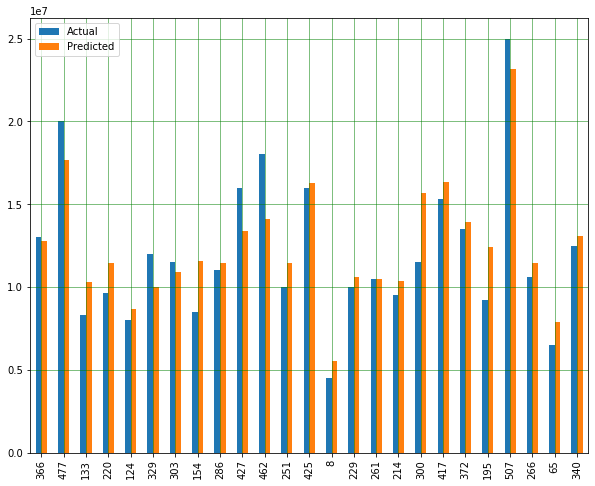

In [155]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [156]:
import pickle
with open('Uttara_House_Price_Prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [157]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [158]:
reg = linear_model.LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.7126687714928226

In [159]:
reg.coef_

array([  57546.58466486, -467615.47102112,   10634.53173539,
             0.        ])

In [160]:
reg.intercept_

-3851993.246990172

In [161]:
reg.predict([[2,2,775,1]])

array([3569631.0752251])

In [162]:
model.predict([[1,1,1,1]])

array([-4251427.60161105])

In [163]:
model.predict([[2,2,1005,1]])

array([6015573.37436496])